# COMS 3251 CLA Lab 2
### Due March 4th on Gradescope

---

[Ruby Galdean], [rag2193]

# Problem 1: Robot Kinematics

## Background

An important class of robots is robot manipulators, which are modeled on human arms. It is natural to model their behaviors by deriving mappings between activity in their *joints* (e.g., your shoulder or elbow) and activity at their *end effector* (e.g., your hand). 

<img src="http://jakehlee.com/cla-s2020/RR_arm.png" width=200>

The robot above is called a **RR manipulator**. It has two *revolute joints* (hence the name "RR") that can rotate and move the attached *links* around; think your shoulder and elbow moving your upper arm and forearm around. The *base* of the arm is fixed, so the end effector has a maximum reach. In addition, the joints can only rotate in the plane, so the entire robot is a planar one.

Let's denote the **joint angles**, both relative to the horizontal axis, with a vector $\theta = (\theta_1, \theta_2)$. One question may ask "given values for the joint angles, what is the end effector's $(x,y)$ position relative to the base?" Unfortunately, the answer to this is given by a nonlinear function involving trigonometric terms, as you may expect. But the mapping between **velocities** is linear, given specific joint angles $\theta$.

$$ 
\begin{bmatrix} \dot x \\ \dot y \end{bmatrix} = J(\theta) \dot \theta = \begin{bmatrix} -l_1 \sin\theta_1 & -l_2 \sin\theta_2 \\ l_1 \cos\theta_1 & l_2 \cos\theta_2 \end{bmatrix} \begin{bmatrix} \dot \theta_1 \\ \dot \theta_2 \end{bmatrix}
$$

*(equation 1)*

The dot notation is shorthand for time derivative; for example, $\dot\theta_1 =\frac{d}{dt} \theta_1$, denoting the angular velocity of the first joint (how fast it's spinning). Same for $\dot\theta_2$, while $\dot x$ and $\dot y$ tell us the horizontal and vertical velocities of the end effector. The matrix $J$ mapping between these two sets of velocities is called the **Jacobian**, and as you can see it changes depending on the values of the joint angles. This should make sense, since a bent robot arm would have different capabilities from one that is straightened out. Finally, the constants $l_1$ and $l_2$ are the lengths of each of the arm links.

## Provided Code (run this first!)

The code block below provides the functions that you'll be using to understand the behavior of this robot. 

The first function, `RR_position`, returns the $(x,y)$ position of the end effector, relative to the base, given the joint angles $\theta$. 

The second function, `RR_jacobian`, returns the Jacobian matrix $J$ given $\theta$. 

The third function, `draw_RR`, plots a simple rendering of the RR arm given $\theta$. 

We will assume for simplicity in this assignment that link lengths are all 1 m.

In [0]:
### THIS NEEDS TO BE RUN FIRST, DO NOT MODIFY###

import numpy as np
import matplotlib.pyplot as plt

l1 = 1
l2 = 1

def RR_position(theta1, theta2):
  return np.array([[l1*np.cos(theta1) + l2*np.cos(theta2)],
                   [l1*np.sin(theta1) + l2*np.sin(theta2)]])

def RR_jacobian(theta1, theta2):
  return np.array([[-l1*np.sin(theta1), -l2*np.sin(theta2)],
                   [l1*np.cos(theta1), l2*np.cos(theta2)]])
  
def draw_RR(theta1, theta2):
  plt.plot([0, l1*np.cos(theta1), l1*np.cos(theta1) + l2*np.cos(theta2)],
           [0, l1*np.sin(theta1), l1*np.sin(theta1) + l2*np.sin(theta2)])
  plt.scatter([0, l1*np.cos(theta1)], [0, l1*np.sin(theta1)], zorder=3, s=50)
  plt.scatter([l1*np.cos(theta1) + l2*np.cos(theta2)], 
              [l1*np.sin(theta1) + l2*np.sin(theta2)], 
              marker='X', zorder=3, s=100)
  plt.grid()
  plt.axis('scaled')
  plt.xlim([-2.5,2.5])
  plt.ylim([-2.5,2.5])

## PART 1 (15 pts)

Let's first try to get an interpretation of the Jacobian matrix. 

**(a)** Complete the draw_RR_velocity() function below that will compute the end effector velocity for given joint angles and velocities using equation 1. It should then use [matplotlib's plt.arrow()](https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/arrow_simple_demo.html) to plot the end effector velocity as an arrow at the end effector. The base of the arrow should be the end effector position, and the $(dx,dy)$ arguments should be the velocity itself. 

**(b)** After you have finished writing this function, overlay the results of two different joint velocity inputs on top of the manipulator. We are interested in the unit joint velocities $\dot\theta = (1,0)$ and $\dot\theta = (0,1)$ at the robot joint configuration $\theta = (\frac\pi6, \frac\pi3)$. First call the `draw_RR` function above to plot the robot arm. Then sequentially call your `draw_RR_velocity` function twice, once with each velocity input, to overlay the arrows on top. You should get a plot similar to the following (but with the arm in the different $\theta$ configuration given above): 

<img src="http://jakehlee.com/cla-s2020/sample_plot.png" width=200>

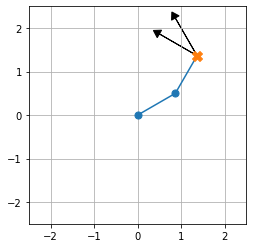

In [296]:
def draw_RR_velocity(theta1, theta2, theta1dot, theta2dot):
  ### (a) COMPLETE THE FUNCTION FOLLOWING THE DESCRIPTION ABOVE ###
  position = RR_position(theta1, theta2)
  thetadot = np.array([[theta1dot],
                       [theta2dot]])
  handsVelocity = np.dot(RR_jacobian(theta1, theta2), thetadot)
  plt.arrow(position[0, 0], position[1 ,0], handsVelocity[0,0], handsVelocity[1,0], head_width=0.2, head_length=0.16, fc='k', ec='k')
  
  # don't return anything.

### DO NOT MODIFY ###
theta1 = np.pi/6
theta2 = np.pi/3
### DO NOT MODIFY ###

### (b) WRITE YOUR CODE HERE TO OBTAIN THE PLOT DESCRIBED ABOVE ###

draw_RR(theta1, theta2)

draw_RR_velocity(theta1, theta2, 1, 0)
draw_RR_velocity(theta1, theta2, 0, 1)

**(c)** Briefly answer the questions (no more than a few sentences each) in the text box below.

1.   How does each column of the Jacobian contribute to the overall end effector velocity vector? *(hint: compare the direction of the first velocity vector with the first link of the arm and the direction of the second velocity vector with the second link)*
2.   What subspace derived from the Jacobian matrix can the vectors serve as a basis for and why? *(hint: in this instance, it is equivalent to $\mathbb{R}^2$)*

**(c)** ANSWERS GO HERE
1. Each velocity component is perpendicular to it's corresponding arm angle
2. The column space of the jacobian .

**(d)** Use [np.linalg.matrix_rank()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.matrix_rank.html) to find and print the rank of the Jacobian at the configuration given above. 

**(e)** Write a couple lines of code to solve the following. If we desire the end effector to move with a velocity of $(\dot x,\dot y)=(3,-2)$ (units are 1 m/s), find the necessary joint velocities $\dot\theta$ to achieve that. Reference *equation 1*.

In [297]:
### DO NOT MODIFY ###
theta1 = np.pi/6
theta2 = np.pi/3
J = RR_jacobian(theta1, theta2)
### DO NOT MODIFY ###

### DO NOT EDIT THE PRINT STATEMENTS, ONLY SET VARIABLES ###

### (d) OBTAIN THE MATRIX RANK HERE ###
rank = None
rank = np.linalg.matrix_rank(J)
print("The rank is:", rank)

### (e) OBTAIN THE JOINT VELOCITIES HERE ###

joint_vel = None
J_inverse = np.linalg.inv(J)
effector_velocity = np.array([[3],
                              [-2]])
joint_vel = np.dot( J_inverse, effector_velocity)
print("The joint velocities are:", joint_vel)

The rank is: 2
The joint velocities are: [[-0.46410162]
 [-3.19615242]]


## PART 2 (15 pts)

We saw above that the Jacobian is full rank at the specified $\theta$ configuration, but that may not always be true. 

**(a)** Consider the configuration $\theta = (\frac\pi4, \frac\pi4)$. Run the code you wrote above (`draw_RR` and `draw_RR_velocity`) with this configuration to show a picture of the robot arm and its velocity vectors for the two unit joint velocity inputs $(1,0)$ and $(0,1)$.

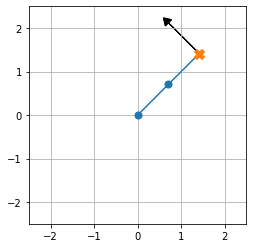

In [298]:
### DO NOT MODIFY ###
theta1 = np.pi/4
theta2 = np.pi/4
### DO NOT MODIFY ###

### (a) WRITE YOUR CODE HERE TO OBTAIN THE PLOT DESCRIBED ABOVE ###
draw_RR(theta1, theta2)

draw_RR_velocity(theta1, theta2, 1, 0)
draw_RR_velocity(theta1, theta2, 0, 1)


**(b)** Given your observations above, describe the achievable end effector velocities by the arm in this joint configuration. Are the velocities linearly independent? 

**(b)** My observation is that the two lines above rest at the same place, so they are not linearly independent because there there exists a coefficient which makes one velocity equal to another. 

**(c)** Use `matrix_rank` and [null_space](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.null_space.html) (under `scipy.linalg`) to find the rank and a basis for the null space of the Jacobian. Use the null space to propose two joint velocity vectors that map to zero end effector velocities, and verify that they are indeed null space vectors by multiplying each one by the Jacobian matrix. Print out each of these outputs sequentially in the code block below.

In [299]:
### DO NOT MODIFY ###
import scipy.linalg
theta1 = np.pi/4
theta2 = np.pi/4
J = RR_jacobian(theta1, theta2)
### DO NOT MODIFY ###

### (c) WRITE YOUR CODE HERE TO OBTAIN THE OUTPUTS DESCRIBED ABOVE ###
### DO NOT EDIT THE PRINT STATEMENTS, ONLY SET VARIABLES ###
rank = None
rank = np.linalg.matrix_rank(J)
print("The rank of the Jacobian is:\n", rank)

null_space = None
null_space = scipy.linalg.null_space(J)
print("The null space of the Jacobian is:\n", null_space)

first = None
first = null_space
second = None
second = -1 * null_space
print("Joint velocity vectors:\n", first, "\n", second)
first_multiply = None
first_multiply = np.dot(J, first)
print("First Jacobian multiply:\n", first_multiply)
second_multiply = None
second_multiply = np.dot (J, second)
print("Second Jacobian multiply:\n", second_multiply)

The rank of the Jacobian is:
 1
The null space of the Jacobian is:
 [[-0.70710678]
 [ 0.70710678]]
Joint velocity vectors:
 [[-0.70710678]
 [ 0.70710678]] 
 [[ 0.70710678]
 [-0.70710678]]
First Jacobian multiply:
 [[0.]
 [0.]]
Second Jacobian multiply:
 [[0.]
 [0.]]


**(d)** Briefly answer the questions (no more than a few sentences each) in the text box below.

1.   Describe what null space input velocities physically correspond to on the robot, and why they lead to zero net movement at the end effector. 
2.   Since the Jacobian is no longer full rank, it cannot be inverted. Describe the end effector velocities that have infinitely many joint velocity inputs, as well as the end effector velocities that are impossible to achieve at all.



**(d)** YOUR ANSWERS GO HERE
1. null space input velocities correspond to how the arm moves around the joint at what speed and what direction. If there is movement in both directions that is equal, then it cancels out.
2.

## PART 3 (15 pts)

In addition to linear velocity, we often care about the angular velocity of the end effector as well. Let's denote the rate at which the end effector is spinning by $\dot\phi$. For the RR arm, we have a simple relationship between $\dot\phi$ and the joint angles: $\dot\phi = \dot\theta_2$, since the end effector is attached to the second link. This introduces a third equation and makes the Jacobian $3 \times 2$: 
$$ \begin{bmatrix} \dot x \\ \dot y \\ \dot\phi \end{bmatrix} = J(\theta) \dot \theta = \begin{bmatrix} -l_1 \sin\theta_1 & -l_2 \sin\theta_2 \\ l_1 \cos\theta_1 & l_2 \cos\theta_2 \\ 0 & 1\end{bmatrix} \begin{bmatrix} \dot \theta_1 \\ \dot \theta_2 \end{bmatrix}$$

**(a)** Define this new Jacobian in code below and find its rank at the two $\theta$ configurations given in Part 1 and Part 2. 

Part 1 $\theta = (\pi/6, \pi/3)$

Part 2 $\theta = (\pi/4, \pi/4)$

In [300]:
def jacobian_phi(theta1, theta2):
  ### (a) COMPLETE THE FUNCTION TO RETURN THE NEW JACOBIAN ###
  
  J = None
  J = np.array([[-l1*np.sin(theta1), -l2*np.sin(theta2)],
                   [l1*np.cos(theta1), l2*np.cos(theta2)],
                [0, 1]])
 
  return J

### (a) WRITE YOUR CODE HERE TO OBTAIN THE OUTPUTS DESCRIBED ABOVE ###
### DO NOT EDIT THE PRINT STATEMENTS, ONLY SET VARIABLES ###
J = jacobian_phi((np.pi/6), (np.pi/3))
part1_rank = None
part1_rank = np.linalg.matrix_rank(J)
print("New Part 1 Jacobian rank:", part1_rank)

J = jacobian_phi((np.pi/4), (np.pi/4))
part2_rank = None
part2_rank = np.linalg.matrix_rank(J)
print("New Part 2 Jacobian rank:", part2_rank)



New Part 1 Jacobian rank: 2
New Part 2 Jacobian rank: 2


**(b)** Briefly answer the questions (no more than a few sentences each) in the text box below.

1.   What is the null space of the Jacobian? Is it possible to achieve a zero end effector velocity given a nonzero joint velocity? 
2.   What is the column space of the Jacobian? Is it possible to achieve any arbitrary end effector velocity?

**(b)** YOUR ANSWERS GO HERE
1.Nullity is 0, meaning there is no possible way to achieve a zero end effector velocity with a nonzero joint velocity since the only solution to Jthetadot=0 is a zero vector.
 is the nullspace of the new Jacobian.
2. The Col(J) are both columns of J.

## PART 4 (15 pts)

You should have seen above that although the robot itself hasn't changed, the properties of its behavior depend on what we are interested in learning about. Let's go back to worrying about the end effector's linear velocities only ($\dot x$ and $\dot y$), but now let's change the robot itself by adding a third joint and link, as shown below. 

<img src="http://jakehlee.com/cla-s2020/RRR_arm.png" width=250>

The Jacobian now becomes a $2 \times 3$ matrix:
$$ \begin{bmatrix} \dot x \\ \dot y \end{bmatrix} = J(\theta) \dot \theta = \begin{bmatrix} -l_1 \sin\theta_1 & -l_2 \sin\theta_2 & -l_3 \sin\theta_3 \\ l_1 \cos\theta_1 & l_2 \cos\theta_2 & l_3 \cos\theta_3 \end{bmatrix} \begin{bmatrix} \dot\theta_1 \\ \dot\theta_2 \\ \dot\theta_3 \end{bmatrix}$$

The code below redefines the functions from above to accommodate this new robot with three joint angles. 

In [0]:
### RUN THIS FIRST BEFORE MOVING ON TO THE LAST PART ###

l1 = 1
l2 = 1
l3 = 1

def RRR_position(theta1, theta2, theta3):
  return np.array([[l1*np.cos(theta1) + l2*np.cos(theta2) + l3*np.cos(theta3)],
                   [l1*np.sin(theta1) + l2*np.sin(theta2) + l3*np.sin(theta3)]])

def RRR_jacobian(theta1, theta2, theta3):
  return np.array([[-l1*np.sin(theta1), -l2*np.sin(theta2), -l3*np.sin(theta3)],
                   [l1*np.cos(theta1), l2*np.cos(theta2), l3*np.cos(theta3)],])
  
def draw_RRR(theta1, theta2, theta3):
  plt.plot([0, l1*np.cos(theta1), l1*np.cos(theta1) + l2*np.cos(theta2),
            l1*np.cos(theta1) + l2*np.cos(theta2) + l3*np.cos(theta3)],
           [0, l1*np.sin(theta1), l1*np.sin(theta1) + l2*np.sin(theta2),
            l1*np.sin(theta1) + l2*np.sin(theta2) + l3*np.sin(theta3)])
  
  plt.scatter([0, l1*np.cos(theta1), l1*np.cos(theta1) + l2*np.cos(theta2)], 
              [0, l1*np.sin(theta1), l1*np.sin(theta1) + l2*np.sin(theta2)], 
              zorder=3, s=50)
  plt.scatter([l1*np.cos(theta1) + l2*np.cos(theta2) + l3*np.cos(theta3)], 
              [l1*np.sin(theta1) + l2*np.sin(theta2) + l3*np.sin(theta3)], 
              marker='X', zorder=3, s=100)
  plt.grid()
  plt.axis('scaled')
  plt.xlim([-3.5,3.5])
  plt.ylim([-3.5,3.5])

**(b)** Replicate the code you wrote in Part 1, but make sure the end effector velocity vectors are plotted in the right place, since the end effector position function is different. The `draw_RRR_velocity` function takes in six arguments, three joint angles and three joint velocities. 

**(c)** After you write this function, use it to draw the end effector velocities corresponding to the three unit joint velocities: $(1,0,0)$, $(0,1,0)$, and $(0,0,1)$. Place the arm in the configuration $\theta = (\frac\pi6, \frac\pi4, \frac\pi3)$.

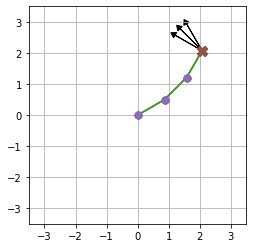

In [302]:
def draw_RRR_velocity(theta1, theta2, theta3, theta1dot, theta2dot, theta3dot):
  ### (b) COMPLETE THE FUNCTION FOLLOWING THE DESCRIPTION ABOVE ###
  position = RRR_position(theta1, theta2, theta3)
  thetadot = np.array([[theta1dot],
                       [theta2dot],
                       [theta3dot]])
  handsVelocity = np.dot(RRR_jacobian(theta1, theta2, theta3), thetadot)
  draw_RRR(theta1, theta2, theta3)
  plt.arrow(position[0, 0], position[1 ,0], handsVelocity[0,0],  handsVelocity[1,0],  head_width=0.2, head_length=0.16, fc='k', ec='k')
  # don't return anything.

### DO NOT MODIFY ###
theta1 = np.pi/6
theta2 = np.pi/4
theta3 = np.pi/3
###

### (c) WRITE YOUR CODE HERE TO OBTAIN THE PLOT DESCRIBED ABOVE ###
draw_RRR_velocity(theta1, theta2, theta3, 1, 0, 0)
draw_RRR_velocity(theta1, theta2, theta3, 0, 1, 0)
draw_RRR_velocity(theta1, theta2, theta3, 0, 0, 1)


**(d)** Are the three velocity vectors linearly independent? What space do they span; in other words, what is the new column space of $J$? Does the addition of the third joint fundamentally change the velocity capabilities of the robot manipulator?

**(d)** YOUR ANSWERS GO HERE
They are linearly independent. They span R^3.


**(e)** Find the rank and a basis for the null space of the RRR Jacobian at three different joint configurations: $\theta' = (\frac\pi6, \frac\pi4, \frac\pi3)$, $\theta'' = (\frac\pi6, \frac\pi4, \frac\pi4)$, and $\theta''' = (\frac\pi4, \frac\pi4, \frac\pi4)$. You can simply print these six quantities in sequence.

In [303]:
### (e) WRITE YOUR CODE HERE TO OBTAIN THE OUTPUTS DESCRIBED ABOVE ###
### DO NOT EDIT THE PRINT STATEMENTS, ONLY SET VARIABLES ###
import scipy
from scipy import linalg, matrix

prime_rank = np.linalg.matrix_rank(RRR_jacobian(theta1, theta2, theta3))
print("Prime rank:\n", prime_rank)

prime_null = scipy.linalg.null_space(RRR_jacobian(theta1, theta2, theta3))
print("Prime null:\n", prime_null)

pprime_rank =  np.linalg.matrix_rank(RRR_jacobian(theta1, theta2, theta2))
print("PPrime rank:\n", pprime_rank)

pprime_null = scipy.linalg.null_space(RRR_jacobian(theta1, theta2, theta2))
print("PPrime null:\n", pprime_null)

ppprime_rank =  np.linalg.matrix_rank(RRR_jacobian(theta2, theta2, theta2))
print("PPPrime rank:\n", ppprime_rank)

ppprime_null = scipy.linalg.null_space(RRR_jacobian(theta2, theta2, theta2))
print("PPPrime null:\n", ppprime_null)

Prime rank:
 2
Prime null:
 [[ 0.41768125]
 [-0.80689822]
 [ 0.41768125]]
PPrime rank:
 2
PPrime null:
 [[-8.03364928e-17]
 [-7.07106781e-01]
 [ 7.07106781e-01]]
PPPrime rank:
 1
PPPrime null:
 [[ 0.81649658  0.        ]
 [-0.40824829 -0.70710678]
 [-0.40824829  0.70710678]]


**(f)** Briefly answer the questions (no more than a few sentences each) in the text box below.

1.   How does the rank of the RRR Jacobian at these different configurations compare to the rank of the RR Jacobian? Consider when it is full rank and when it loses rank.
2.   Explain why the null space of the RRR Jacobian is always nontrivial, in contrast to the RR Jacobian. 



**(f)** YOUR ANSWERS GO HERE
1. Full rank for RRR occurs when one, two, or all three joint angles are the different. Three joint angles being the same loses rank. RR has full rank only if both joint velocities are different. 
2. Isn't RR square and invertible. RRR isn't invertible which would result in a non-trival nullspace.

# Problem 2: Shape Puzzle

## Background

In Lecture 2 (BV 2.1-2.2), you learned about linear functions. In Lecture 5 (LLM 1.8-1.9), you learned about linear transformations, specifically about **geometric linear transformations** of $\mathbb{R}^2$. In this lab, we'll explore **geometric affine transformations**.

The main difference of affine transformations from linear transformations is that it allows for translations, not just transformations around the origin. This makes intuitive sense if you consider that linear transformations are represented as $ax$, whereas affine transformations are represented as $ax+b$.

Affine transformations in $\mathbb R^2$ are represented as $3 \times 3$ matrices, in contrast to the $2 \times 2$ linear transformation matrices. Locations and displacments are represented as $3 \times 1$ vectors instead of $2 \times 1$, and are called **homogeneous coordinates**. We just add a $1$ in the third dimension, like this:

 $$\begin{bmatrix}x \\ y \\ 1 \end{bmatrix}$$

The main insight here is that we are using 3-vectors (with one fixed value) to represent 2D objects! Let's actually see these transformations in action.



## Definitions

Let's first define the affine transformation matrices you will be using for this lab. Compare these with the linear transformation matrices that appeared in lecture as well as LLM 1.9. The linear ones now appear as $2 \times 2$ submatrices in the upper-left block of the affine transformations.

In the context of this lab, all units are in pixels, all scales are in percentages (1 = 100%), and all angles are in radians.

<img src=https://upload.wikimedia.org/wikipedia/commons/2/2c/2D_affine_transformation_matrix.svg width=400>

(shared under CC BY-SA 3.0 from [wikipedia](https://en.wikipedia.org/wiki/Transformation_matrix#Affine_transformations) )

## Combining Affine Functions

Analogous to linear functions, the composition of affine functions is itself an affine function. That is, given affine functions $f(x)$ and $g(x)$, $f(g(x))$ is also an affine function. This means that we can combine multiple affine transformation matrices into a single matrix before applying it to $\mathbb{R}^2$.

Since an affine transformation matrix $A$ is applied to a point $x$ as $Ax$, another such matrix $B$ can be applied again (say, rotation then translation) as $B(Ax)$. Since matrix multiplication is associative (Lecture 3, BV 10.1), we can also express this as $(BA)x$.

In summary, if we want to apply transformation matrices $A$, $B$, then $C$ (in that order), we can calculate another affine transformation matrix $D = CBA$ that performs all three transformations, in order, at once. Note that matrix multiplication is not commutative, so order matters!

## Coordinates in Computer Vision

In computer vision, the origin is on the **TOP LEFT** of the image, and the positive y axis points **down**. Keep this in mind when determining your transformations.

![alt text](https://software.intel.com/sites/landingpage/realsense/camera-sdk/v1.1/documentation/html/manuals_clip0138_zoom69.png)

## PART 1 (20 pts)

You were given a template image `puzzle.png`. Given a square and circle, use affine transformation matrices to transform them to the positions shown in the template.

**(a)** Fill in the provided functions to generate their respective affine transformation matrices (10 pts).

There are **banned functions**. Using these functions will result in 0 points awarded.

```
cv2.getAffineTransform()
cv2.getPerspectiveTransform()
cv2.getRotationMatrix2D()
cv2.resize()
cv2.invertAffineTransform()
```
in addition, any other function from any library that generates an affine transformation matrix for you is banned. You must construct the matrices directly.

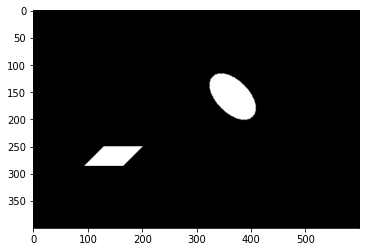

In [304]:
### THIS NEEDS TO BE RUN FIRST ###

# UPLOAD YOUR puzzle.png
# Click on the folder icon on the sidebar and click "Upload"
# You will have to do this every time you start a new session
# Alternatively, you could learn how to use "Mount Drive".
%matplotlib inline
import numpy as np              # numpy
import cv2                      # opencv
import math                     # math
import matplotlib.pyplot as plt # matplotlib, only being used to display images

#If your image was uploaded successfully, the template will be shown below
template = cv2.imread('puzzle.png', cv2.IMREAD_UNCHANGED)
if template is None:
	print("ERROR: upload the image!")
plt.imshow(template)

### UTILITY FUNCTIONS DO NOT MODIFY###

def combine_layers(layers):
	layer0 = layers[0]
	for l in layers[1:]:
		layer0[:,:,0] = (l[:,:,3] / 255) * l[:,:,0] + \
                        ((255 - l[:,:,3]) / 255) * layer0[:,:,0]
		layer0[:,:,1] = (l[:,:,3] / 255) * l[:,:,1] + \
                        ((255 - l[:,:,3]) / 255) * layer0[:,:,1]
		layer0[:,:,2] = (l[:,:,3] / 255) * l[:,:,2] + \
                        ((255 - l[:,:,3]) / 255) * layer0[:,:,2]
	return layer0

In [0]:
### PART 1 ###
# Fill in the functions below

def get_translate(x, y):
    """Generate an affine translation matrix.

    arguments:
    x -- x-axis translation in pixels
    y -- y-axis translation in pixels

    returns:
    A 3x3 numpy array of type 'np.float'
    """
    ### YOUR CODE GOES HERE ###
    trans_array = np.array([[1, 0, x],
                            [0, 1, y],
                            [0, 0, 1]]);
    return trans_array;
 
    # return np.zeros((3,3)).astype(np.float)

def get_rotate(theta):
    """Generate an affine rotation matrix.

    arguments:
    theta -- rotation in radians

    returns:
    A 3x3 numpy array of type 'np.float'
    """
    ### YOUR CODE GOES HERE ###
    rot_array = np.array([[np.cos(theta), np.sin(theta), 0],
                          [-(np.sin(theta)), np.cos(theta), 0],
                          [0, 0, 1]]);
    return rot_array;
    
    #return np.zeros((3,3)).astype(np.float)

def get_shear(phi):
    """Generate an affine horizontal shear matrix.

    arguments:
    phi -- shear in radians

    returns:
    A 3x3 numpy array of type 'np.float'
    """
    ### YOUR CODE GOES HERE ###
    shear_array = np.array([[1, np.tan(phi), 0],
                            [0, 1, 0],
                            [0, 0, 1]]);
    return shear_array;
    
    #return np.zeros((3,3)).astype(np.float)

def get_scale(w):
    """Generate an affine horizontal scale matrix.

    arguments:
    w -- x-axis scale (1 = 100%)

    returns:
    A 3x3 numpy array of type 'np.float'
    """
    ### YOUR CODE GOES HERE ###
    scale_array = np.array([[w, 0, 0],
                            [0, 1, 0],
                            [0, 0, 1]]);
    return scale_array;
    
    #return np.zeros((3,3)).astype(np.float)


## PART 2 (20 pts)

**(b)** Use the completed functions to form a **single** affine transformation matrix that will transform the shapes to match the template. The test function will draw your results in blue and red, with some transparency: If the results match exactly, there will be no visible white borders inside or outside the shape (20 pts for each shape).

### Constraints

To prevent this task from becoming manual unconstrained optimization in continuous space, we have discretized this problem as follows:

* The canvas is 400 by 600 pixels
* All **translation** was done in steps of 50 pixels
* All **rotations** were done in steps of $\pi / 4$
* All **shears** were done in steps of $\pi / 4$
* All **scalings** were done in steps of $0.25$
* Only **horizontal** shearing and stretching was used
* The circle wasn't sheared

### Hints

* You should probably apply the translation matrix **last**. Since all transformations are done with respect to the origin, translating then rotating will result in unexpected results.
* In computer vision, the origin is on the **TOP LEFT** of the image, and the positive x axis points **down**. Keep this in mind when determining your transformations.
* It's probably easier to just start trying out some transformations to see what they look like before trying to solve the puzzle! Just running everything will give you the shapes without any transformations.

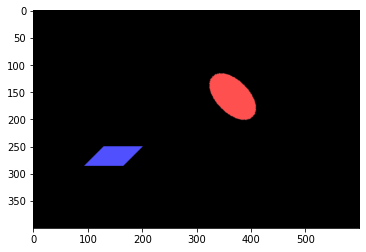

In [306]:
### PART 2 ###
# (remember to run PART 1 first)

def get_circle_transform():
    """Generate the final affine transformation matrix for the circle.

    returns:
    A 3x3 numpy array of type 'np.float'
    """
    # return the final affine transformation matrix,
    # which will be a combination of matrices returned by 
    # functions you defined above for part (a)
    ### YOUR CODE GOES HERE ###

    circ = np.dot( np.identity(3), get_rotate(7/4*(np.pi)) );
    circ = np.dot( circ, get_scale(1.75) );
    circ = np.dot( get_translate(350,100), circ);

    return circ;

def get_square_transform():
    """Generate the final affine transformation matrix for the square.

    returns:
    A 3x3 numpy array of type 'np.float'
    """

    # return the final affine transformation matrix,
    # which will be a combination of matrices returned by 
    # functions you defined above for part (a)
    ### YOUR CODE GOES HERE ###

    sqr = np.dot( np.identity(3), get_scale(1));
 #   sqr = np.dot(  get_rotate(-(1/4)*(np.pi)),sqr );
 #   sqr = np.dot(sqr, get_shear((3/4)*(np.pi)))
    sqr = np.dot(  get_rotate(-(3/4)*(np.pi)),sqr );
    sqr = np.dot(sqr, get_shear((5/4)*(np.pi)))
 #   sqr = np.dot( get_translate(100,250), sqr);
    sqr = np.dot( get_translate(200,250), sqr);

    return sqr;

### TEST FUNCTIONS, DO NOT MODIFY ###

def vis_transforms():
    puzzle = template.copy()
    circ_M = get_circle_transform()
    sq_M = get_square_transform()

    bg1 = np.zeros((400, 600, 4)).astype(np.float)
    sq = cv2.rectangle(bg1, (0,0), (50,50), (0,0,255,175), -1)
    sq_t = cv2.warpAffine(sq, sq_M[:2,:], (600, 400))

    bg2 = np.zeros((400, 600, 4)).astype(np.float)
    circ = cv2.circle(bg2, (30,30), 30, (255,0,0,175), -1)
    circ_t = cv2.warpAffine(circ, circ_M[:2,:], (600, 400))

    output = combine_layers([puzzle, sq_t, circ_t])

    plt.imshow(output)

vis_transforms()
